In [1]:
#Set up the environment
library(reshape2)
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
#Load in the top SNP data
setwd("../data")
top.snp.df = read.table("ancestry_top_snp_df.txt", sep = "\t", header = TRUE)

In [6]:
#Load in the merged frequency dataset
setwd('../data')
merged.frequency.dataset = read.table("merged_frequency_dataset.txt", sep = "\t", header = TRUE)

In [7]:
#Merge the two datasets together
merged.top.snp.and.frequency = inner_join(top.snp.df, merged.frequency.dataset, by = "snp")

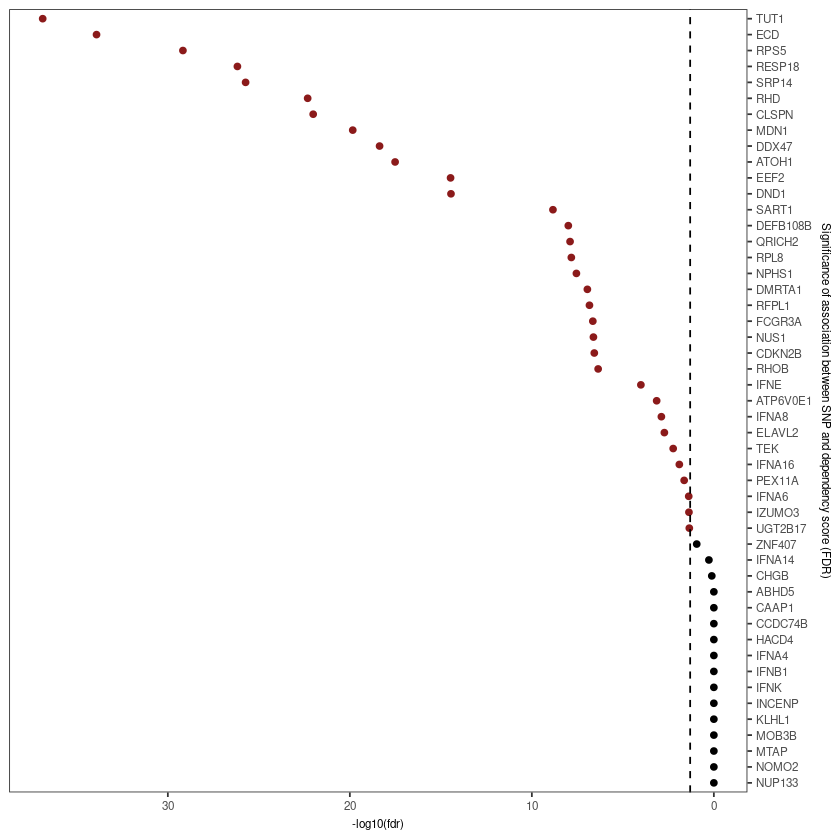

In [12]:
#Plot the plot
merged.top.snp.and.frequency %>%
arrange(fdr) %>%
mutate(gene = factor(gene, levels = gene)) %>%
mutate("color_flag" = ifelse(fdr > 0.05, FALSE, TRUE)) %>%
ggplot(aes(x = -log10(fdr), y = gene, color = color_flag)) +
geom_point() +

scale_color_manual(values = c("black", "firebrick4")) + 

geom_vline(xintercept = 1.302, linetype = 2) +

theme_bw() +

theme(
panel.grid.major = element_blank(),
panel.grid.minor = element_blank(), 
) +

theme(
axis.title.x = element_text(color = "black", size = 7),
axis.title.y = element_text(color = "black", size = 7)
) +

theme(
axis.text = element_text(size = 7),
axis.title = element_text(size = 7)
) +

theme(
legend.title = element_text(size = 7),
legend.text = element_text(size = 7)
) +

scale_y_discrete(position = "right", limits = rev) +
scale_x_reverse() +

theme(
legend.position = "none"
) +

ylab("Significance of association between SNP and dependency score (FDR)") 

#Export it to the google bucket
setwd('../output')
ggsave("figure_2a.pdf", width = 2, height = 4.5)

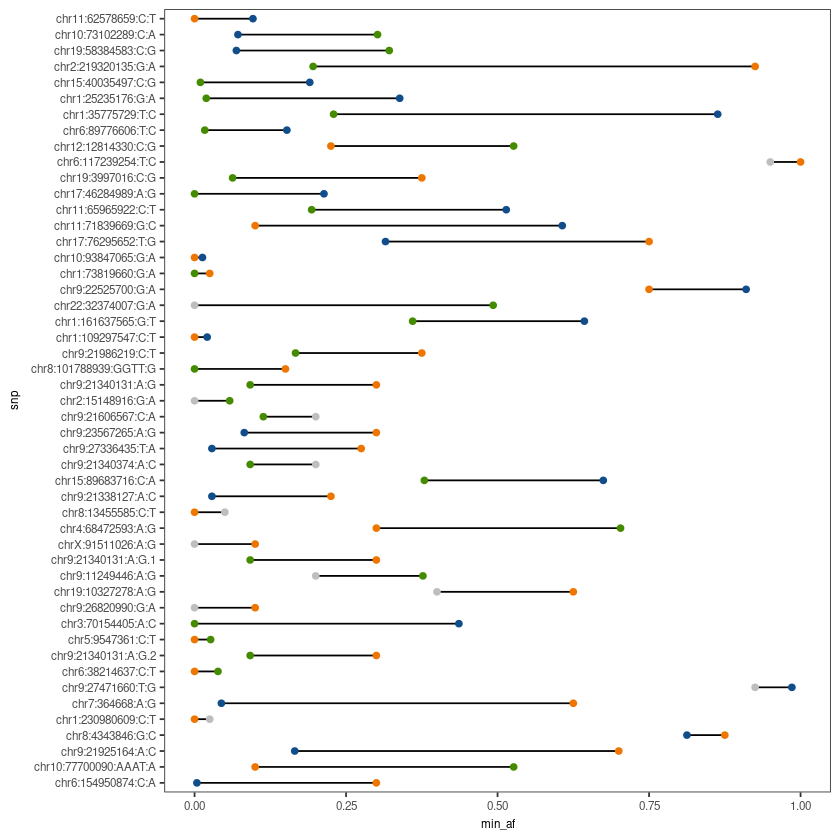

In [13]:
#Plot the other plotaroonie
merged.top.snp.and.frequency %>%
arrange(fdr) %>%
mutate(snp = make.unique(snp)) %>%
mutate(snp = factor(snp, levels = snp)) %>%
select(snp, gene, afr_allele_fraction, eas_allele_fraction, eur_allele_fraction, admixed_allele_fraction) %>%
mutate("min_af" = pmin(afr_allele_fraction, eas_allele_fraction, eur_allele_fraction, admixed_allele_fraction)) %>%
mutate("max_af" = pmax(afr_allele_fraction, eas_allele_fraction, eur_allele_fraction, admixed_allele_fraction)) %>%
mutate("min_color_flag" = ifelse(min_af == afr_allele_fraction, "afr",
                                ifelse(min_af == eas_allele_fraction, "eas",
                                      ifelse(min_af == eur_allele_fraction, "eur",
                                            ifelse(min_af == admixed_allele_fraction, "admixed", "NA"))))) %>%
mutate("max_color_flag" = ifelse(max_af == afr_allele_fraction, "afr",
                                ifelse(max_af == eas_allele_fraction, "eas",
                                      ifelse(max_af == eur_allele_fraction, "eur",
                                            ifelse(max_af == admixed_allele_fraction, "admixed", "NA"))))) %>%
ggplot() +
geom_segment(aes(x = min_af, xend = max_af, y = snp, yend = snp, color = "grey")) +
geom_point(aes(x = min_af, y = snp, color = min_color_flag)) +
geom_point(aes(x = max_af, y = snp, color = max_color_flag)) +

scale_color_manual(values = c("grey", "darkorange2", "chartreuse4", "dodgerblue4", "black")) +

theme_bw() +

theme(
panel.grid.major = element_blank(),
panel.grid.minor = element_blank(), 
) +

theme(
axis.title.x = element_text(color = "black", size = 7),
axis.title.y = element_text(color = "black", size = 7)
) +

theme(
axis.text = element_text(size = 7),
axis.title = element_text(size = 7)
) +

theme(
legend.title = element_text(size = 7),
legend.text = element_text(size = 7)
) +

scale_y_discrete(limits = rev) +

theme(
legend.position = "none"
) 


#Export it to the google bucket
setwd('../output')
ggsave("figure_2b.pdf", width = 3, height = 4.5)